In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from camera import Camera
import cv2
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

In [2]:
# First time running this, requires internet connection
# Initialize the OCR model
ocr = PaddleOCR(use_angle_cls=False, lang='en')  # Disable text orientation classification

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 466kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:07<00:00, 1.40MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:12<00:00, 175kiB/s] 


[2024/06/26 09:47:31] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [3]:
"""
Initialize camera
"""
# camera
camera = Camera()
print("Camera connected: ", camera.connect())

Camera connected:  True


[2024/06/26 09:48:58] ppocr DEBUG: dt_boxes num : 4, elapsed : 1.0121636390686035
[2024/06/26 09:48:59] ppocr DEBUG: rec_res num  : 4, elapsed : 1.1295757293701172
[[[[375.0, 298.0], [573.0, 285.0], [574.0, 308.0], [376.0, 321.0]], ('ORDER BY6PFOR', 0.8991615772247314)], [[[376.0, 323.0], [575.0, 311.0], [576.0, 336.0], [377.0, 348.0]], ('SAME DAY SHPING', 0.8952633738517761)], [[[582.0, 462.0], [645.0, 462.0], [645.0, 479.0], [582.0, 479.0]], ('3510', 0.8282309174537659)], [[[672.0, 461.0], [771.0, 458.0], [772.0, 478.0], [673.0, 479.0]], ('uine.com', 0.9700552225112915)]]


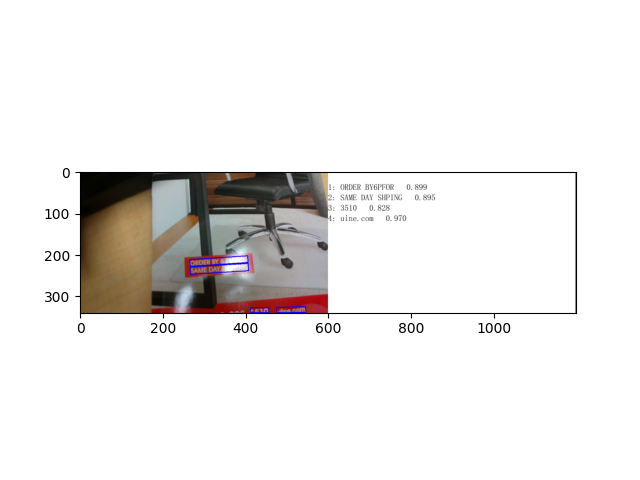

In [6]:
"""
detection loop
"""
# camera data
_, _, _, _, _, color_img, _, _, _= camera.get_all()

# Perform OCR on the image
result = ocr.ocr(color_img, cls=False)  # cls=False disables text orientation classification

# Print the OCR results
for line in result:
    print(line)

# Extract text and box coordinates
boxes = [line[0] for line in result[0]]
texts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Draw the OCR results on the image
color_img = draw_ocr(color_img, boxes, texts, scores, font_path='simfang.ttf')
#color_img = Image.fromarray(color_img)

# Display the image
fig, ax = plt.subplots(frameon=False)
ax.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
"""
Always close the camera, once your application is over
"""
# terminate the session
camera.close()

True